In [1]:
import json
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import sys
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
import pandas as pd
import os

In [30]:
# df = pd.read_csv('./EfficientDet/efficientdet_submission_50.csv')
# df = pd.read_csv('./Ensemble/submission/first.csv')
df = pd.read_csv('../submission_50.csv')

df

,PredictionString,image_id
0,7 0.9934956 215.56236 61.34445 460.61023 452.7...,test/0000.jpg
1,5 0.89629453 354.65857 254.62216 755.4824 692....,test/0001.jpg
2,1 0.9499036 85.0188 281.64557 388.45914 605.74...,test/0002.jpg
3,9 0.83001935 76.46069 250.58337 925.93256 813....,test/0003.jpg
4,1 0.9733738 194.7038 282.34048 880.9372 766.1632,test/0004.jpg
...,...,...
4866,1 0.79302925 290.93805 349.86456 670.8876 690....,test/4866.jpg
4867,3 0.94433063 410.40005 324.5226 768.0698 697.1...,test/4867.jpg
4868,7 0.9728442 118.721436 480.956 753.9708 841.2105,test/4868.jpg
4869,7 0.85304457 -0.3055725 233.58365 1023.2284 93...,test/4869.jpg


In [31]:
def get_file_path(json_file, image_num):
    file_path = json_file['images'][image_num]['file_name']
    return file_path

def read_image(dataset_path, file_path):
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_annotations(df, image_num):
    # anns = [ann for ann in json_file['annotations'] if ann['image_id'] == image_num]
    labels = []
    anns = []
    ann = []
    if type(df.loc[image_num]['PredictionString']) == float:
        return anns
    
    cur_df = df.loc[image_num]['PredictionString'].split()
    for j, _ in enumerate(cur_df):
        if j % 6 == 0:
            labels.append(int(cur_df[j]))
        elif j % 6 == 1:
            continue
        else:
            ann.append(float(cur_df[j]))
            if len(ann) == 4:
                anns.append(ann)
                ann = []
    return anns, labels

def plot_bbox(image, anns, labels):
    classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")
    for ann, label in zip(anns, labels):
        color = list(np.random.random(size=3) * 256)
        xmin, ymin, xmax, ymax = ann
        image = cv2.putText(image, classes[label], (int((xmin)), int((ymin+ymax)/2)), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 3)
        image = cv2.rectangle(image, (int(xmin),int(ymin)), (int(xmax), int(ymax)), color, 3)
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    
def plot_box(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image)

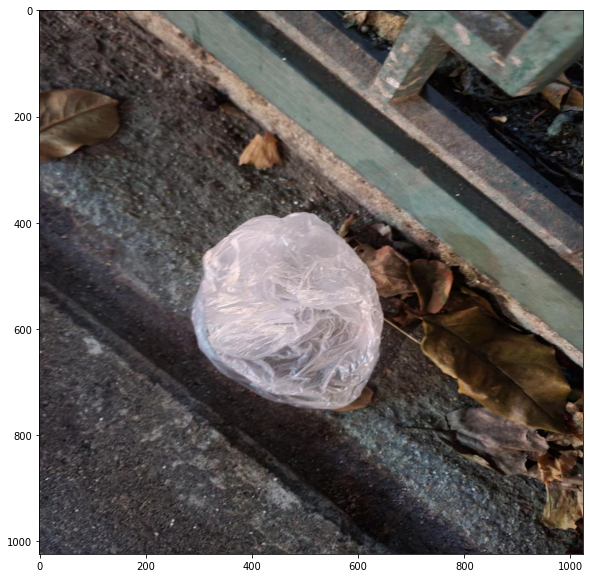

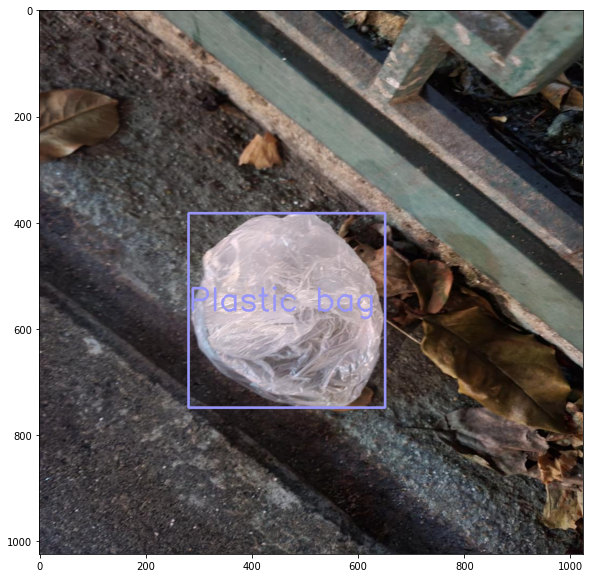

In [37]:
with open('../dataset/test.json','r') as f:
    test_json = json.load(f)
dataset_path = '../dataset/'

image_number = 1354
file_path = get_file_path(test_json, image_number)
anns, labels = get_annotations(df, image_number)
image = read_image(dataset_path, file_path)
plot_box(image)
plot_bbox(image, anns, labels)
